# Exploratory Data Analysis

Notebook ini merupakan bagian dari buku **Machine Learning menggunakan Python** oleh **Fahmi Noor Fiqri**. Notebook ini berisi contoh kode untuk **BAB III - Exploratory Data Analysis.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Membaca Data

In [2]:
df = pd.read_csv(r'../datasets/adult.csv', na_values=["?"])

## Keterangan Kolom

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Persentase Data Kosong

In [4]:
df.isnull().sum() / len(df) * 100

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.790486
income            0.000000
dtype: float64

## Statistik Deskriptif

In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Sampel Data

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [8]:
df[df.duplicated()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,NaN,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [9]:
df[df.isnull().any(axis=1)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,>50K
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,NaN,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,NaN,<=50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,NaN,320084,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
32531,30,NaN,33811,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
32541,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [10]:
df.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
735,35,Private,234901,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,2407,0,40,United-States,<=50K
12691,21,Private,263641,HS-grad,9,Divorced,Sales,Other-relative,White,Female,0,0,40,United-States,<=50K
32247,44,Federal-gov,38434,Bachelors,13,Widowed,Exec-managerial,Unmarried,White,Female,0,0,40,United-States,>50K
22320,42,Local-gov,109684,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,0,1741,35,United-States,<=50K
11307,40,Private,326310,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,44,United-States,<=50K


In [11]:
df.groupby("income").apply(lambda x: x.sample(2))

age  workclass  fnlwgt    education  education-num  \
income                                                             
<=50K  4178    49    Private  166789      HS-grad              9   
       29923   55  Local-gov  176046      Masters             14   
>50K   9059    41    Private   35166  Prof-school             15   
       22544   62    Private  205643  Prof-school             15   

                  marital-status      occupation relationship   race     sex  \
income                                                                         
<=50K  4178   Married-civ-spouse    Adm-clerical      Husband  White    Male   
       29923  Married-civ-spouse  Prof-specialty         Wife  White  Female   
>50K   9059   Married-civ-spouse  Prof-specialty      Husband  White    Male   
       22544  Married-civ-spouse    Craft-repair      Husband  White    Male   

              capital-gain  capital-loss  hours-per-week native-country income  
income                                                                          
<=50K  4178              0             0              40  United-States  <=50K  
       29923             0          2267              40  United-States  <=50K  
>50K   9059          15024             0              50  United-States   >50K  
       22544             0             0              45  United-States   >50K

## Cross Tabulation

In [12]:
pd.crosstab(df["occupation"], df["sex"])

sex,Female,Male
occupation,,
Adm-clerical,2537,1233
Armed-Forces,0,9
Craft-repair,222,3877
Exec-managerial,1159,2907
Farming-fishing,65,929
Handlers-cleaners,164,1206
Machine-op-inspct,550,1452
Other-service,1800,1495
Priv-house-serv,141,8


In [13]:
pd.crosstab(df["occupation"], df["education"])

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
occupation,,,,,,,,,,,,,,,,
Adm-clerical,38,67,38,0,6,11,14,193,167,506,5,1365,68,2,9,1281
Armed-Forces,0,0,1,0,0,0,0,0,0,1,0,4,1,0,0,2
Craft-repair,170,175,58,23,43,116,96,115,252,226,2,1922,22,4,7,868
Exec-managerial,24,34,13,4,1,19,13,145,150,1369,55,807,501,0,52,879
Farming-fishing,44,37,16,18,36,70,28,14,52,77,1,404,10,9,4,174
Handlers-cleaners,71,123,38,16,40,46,49,24,28,50,0,611,5,2,0,267
Machine-op-inspct,101,99,35,23,56,93,76,33,63,69,1,1023,8,11,1,310
Other-service,194,238,85,40,64,98,101,78,115,181,1,1281,19,15,4,781
Priv-house-serv,6,14,4,11,14,8,10,2,4,7,0,50,1,2,0,16


## Pivot Table

In [14]:
pd.pivot_table(df, index=["sex"], aggfunc=np.mean)

,age,capital-gain,capital-loss,education-num,fnlwgt,hours-per-week
sex,,,,,,
Female,36.858230,568.410547,61.187633,10.035744,185746.311206,36.410361
Male,39.433547,1329.370078,100.213309,10.102891,191771.449013,42.428086


In [15]:
pd.pivot_table(df, index=["sex"], aggfunc=[np.mean, np.sum])

mean                                                         \
              age capital-gain capital-loss education-num         fnlwgt   
sex                                                                        
Female  36.858230   568.410547    61.187633     10.035744  185746.311206   
Male    39.433547  1329.370078   100.213309     10.102891  191771.449013   

                          sum                                          \
       hours-per-week     age capital-gain capital-loss education-num   
sex                                                                     
Female      36.410361  397000      6122350       659052        108095   
Male        42.428086  859257     28966974      2183648        220142   

                                   
            fnlwgt hours-per-week  
sex                                
Female  2000673518         392176  
Male    4178699874         924508

In [16]:
pd.pivot_table(df, index=["occupation", "sex"], columns=["education"], values=["capital-gain"], fill_value=0).round(2)

capital-gain                                     \
education                        10th     11th     12th  1st-4th 5th-6th   
occupation        sex                                                      
Adm-clerical      Female       132.14    21.53   378.42     0.00    0.00   
                  Male           0.00     0.00   171.93     0.00  599.00   
Armed-Forces      Male           0.00     0.00     0.00     0.00    0.00   
Craft-repair      Female         0.00  1564.89     0.00     0.00    0.00   
                  Male         787.42   360.48   273.33   174.95  129.45   
Exec-managerial   Female       367.00     0.00     0.00     0.00    0.00   
                  Male         276.00   873.41   605.36  1922.00    0.00   
Farming-fishing   Female         0.00     0.00     0.00     0.00    0.00   
                  Male         696.08    70.37     0.00   210.06  153.18   
Handlers-cleaners Female         0.00   188.60     0.00     0.00    0.00   
                  Male        1683.27   303.12     0.00     0.00  281.82   
Machine-op-inspct Female       115.47   201.44     0.00   294.57    0.00   
                  Male          98.89   147.69     0.00     0.00  326.12   
Other-service     Female        66.43    33.85     0.00     0.00  111.71   
                  Male         102.32   152.65   196.17     0.00  154.51   
Priv-house-serv   Female         0.00     0.00     0.00     0.00  155.43   
                  Male           0.00     0.00     0.00     0.00    0.00   
Prof-specialty    Female         0.00   517.80   351.67     0.00    0.00   
                  Male        2868.80     0.00     0.00     0.00    0.00   
Protective-serv   Female         0.00     0.00     0.00     0.00    0.00   
                  Male           0.00  2989.33     0.00     0.00    0.00   
Sales             Female         0.00    78.47     0.00     0.00    0.00   
                  Male         335.77   237.89  1909.88     0.00    0.00   
Tech-support      Female         0.00     0.00     0.00     0.00    0.00   
                  Male           0.00     0.00     0.00     0.00    0.00   
Transport-moving  Female         0.00     0.00     0.00     0.00    0.00   
                  Male          34.32   274.82   867.51     0.00  232.04   

                                                                           \
education                7th-8th       9th Assoc-acdm Assoc-voc Bachelors   
occupation        sex                                                       
Adm-clerical      Female    0.00     14.25     328.07    337.78   1499.40   
                  Male    607.22    863.00     293.80   1099.57    792.44   
Armed-Forces      Male      0.00      0.00       0.00      0.00      0.00   
Craft-repair      Female    0.00  19999.80       0.00      0.00    464.07   
                  Male    236.55    133.20     373.42    526.43    964.68   
Exec-managerial   Female    0.00      0.00    1137.53    316.42    793.83   
                  Male    799.50    602.50    1038.41   1361.67   3071.71   
Farming-fishing   Female    0.00      0.00       0.00      0.00      0.00   
                  Male    538.95      0.00    1152.23    275.56   1183.00   
Handlers-cleaners Female    0.00      0.00       0.00      0.00      0.00   
                  Male     94.60    265.16     653.22      0.00    393.52   
Machine-op-inspct Female  280.87    110.54    1502.86      0.00      0.00   
                  Male    247.61    175.88     641.00    378.75    555.56   
Other-service     Female    0.00     77.52     103.51    243.69    224.66   
                  Male      0.00     98.53     235.42    222.78   1432.37   
Priv-house-serv   Female  370.50    346.33       0.00      0.00   5047.20   
                  Male      0.00      0.00       0.00    594.00      0.00   
Prof-specialty    Female    0.00      0.00    1902.15   1020.23   1174.51   
                  Male      0.00      0.00     461.69   2759.75   1649.26   
Protective-serv   Female    0.00      0.00       0

In [17]:
pd.pivot_table(df, index=["occupation", "income"], columns=["race"], values=["capital-gain"], fill_value=0).round(2)

capital-gain                              \
race                     Amer-Indian-Eskimo Asian-Pac-Islander    Black   
occupation        income                                                  
Adm-clerical      <=50K              209.36              87.47   138.01   
                  >50K                 0.00             864.32  3008.79   
Armed-Forces      <=50K                0.00               0.00     0.00   
                  >50K                 0.00               0.00     0.00   
Craft-repair      <=50K                0.00             176.70   137.44   
                  >50K              9394.00            2232.00  1722.16   
Exec-managerial   <=50K              637.74             160.01    75.46   
                  >50K              5008.00            6622.28  2325.17   
Farming-fishing   <=50K                0.00               0.00    14.14   
                  >50K                 0.00            3649.00     0.00   
Handlers-cleaners <=50K                0.00             176.55    53.52   
                  >50K                 0.00            7298.00  3790.36   
Machine-op-inspct <=50K                0.00             150.88    96.10   
                  >50K                 0.00            1079.10  2778.91   
Other-service     <=50K              254.97              62.43    69.08   
                  >50K              3844.00            7668.29  2647.47   
Priv-house-serv   <=50K                0.00               0.00   111.32   
                  >50K                 0.00               0.00     0.00   
Prof-specialty    <=50K              282.27             200.79    86.13   
                  >50K              2669.82            7311.91  7411.08   
Protective-serv   <=50K              775.00               0.00    78.71   
                  >50K                 0.00               0.00  6636.76   
Sales             <=50K              429.36              61.05    77.66   
                  >50K              7277.00             713.62  8895.26   
Tech-support      <=50K                0.00             243.34   238.76   
                  >50K                 0.00            2425.67  4392.85   
Transport-moving  <=50K                0.00               0.00   268.69   
                  >50K                 0.00               0.00  1688.89   

                                              
race                         Other     White  
occupation        income                      
Adm-clerical      <=50K     164.04    137.53  
                  >50K        0.00   2912.46  
Armed-Forces      <=50K       0.00      0.00  
                  >50K        0.00      0.00  
Craft-repair      <=50K       0.00    151.24  
                  >50K     1035.60   2359.59  
Exec-managerial   <=50K       0.00    188.72  
                  >50K     3649.00   4506.45  
Farming-fishing   <=50K       0.00    289.86  
                  >50K        0.00   3060.44  
Handlers-cleaners <=50K       0.00    122.13  
                  >50K        0.00   2183.04  
Machine-op-inspct <=50K      99.50    170.88  
                  >50K        0.00   1440.17  
Other-service     <=50K     101.60     81.30  
                  >50K        0.00   1912.98  
Priv-house-serv   <=50K       0.00    118.10  
                  >50K        0.00  25236.00  
Prof-specialty    <=50K       0.00    201.93  
                  >50K    23076.22   5623.76  
Protective-serv   <=50K     287.75    280.71  
                  >50K        0.00   1045.25  
Sales             <=50K       0.00    140.66  
                  >50K     2562.67   4472.32  
Tech-support      <=50K       0.00    191.61  
                  >50K        0.00   1597.70  
Transport-moving  <=50K     312.62    112.98  
                  >50K        0.00   1997.62

## Charting

<AxesSubplot:>

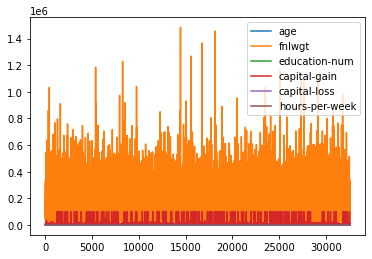

In [18]:
df.plot()

<AxesSubplot:>

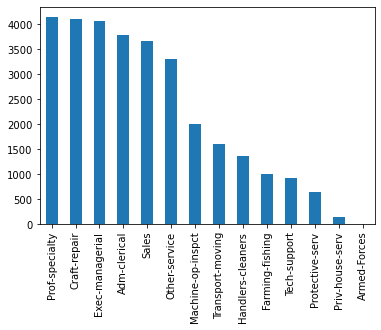

In [19]:
df["occupation"].value_counts().plot(kind="bar")

<AxesSubplot:ylabel='sex'>

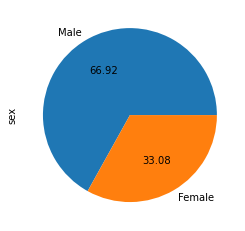

In [20]:
df["sex"].value_counts().plot(kind="pie", autopct='%.2f')

<AxesSubplot:xlabel='hours-per-week', ylabel='capital-gain'>

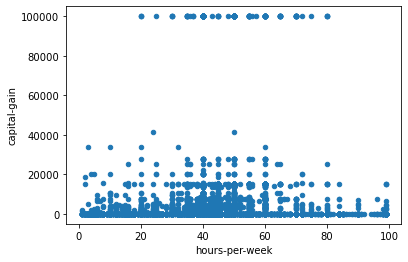

In [21]:
df.plot.scatter(x='hours-per-week', y='capital-gain')

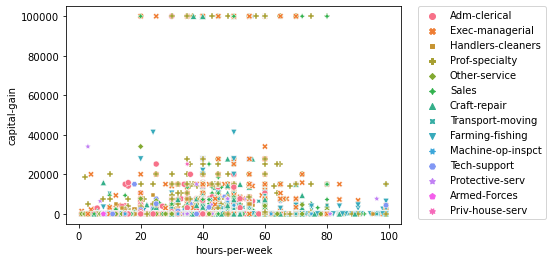

In [22]:
sns.scatterplot(data=df, x='hours-per-week', y='capital-gain', hue="occupation", style="occupation")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Plotting

<AxesSubplot:xlabel='sex', ylabel='hours-per-week'>

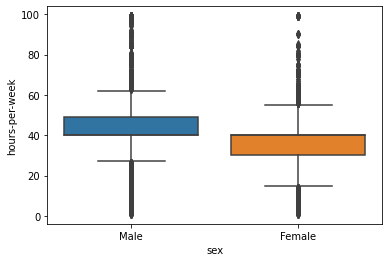

In [23]:
sns.boxplot(data=df, x="sex", y="hours-per-week")

<AxesSubplot:xlabel='workclass', ylabel='hours-per-week'>

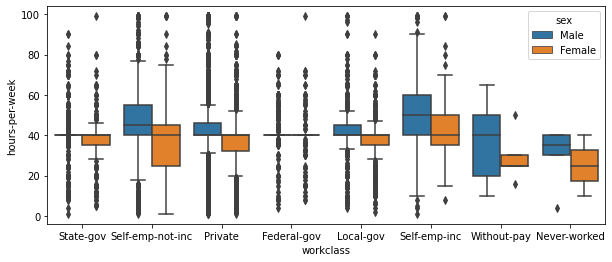

In [24]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(data=df, x="workclass", y="hours-per-week", hue="sex", ax=ax)

<AxesSubplot:xlabel='hours-per-week', ylabel='occupation'>

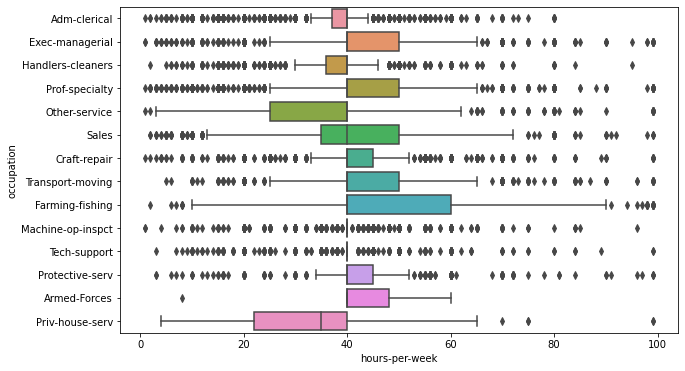

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(y="occupation", x="hours-per-week", orient="h", data=df, ax=ax)

<AxesSubplot:xlabel='age', ylabel='Count'>

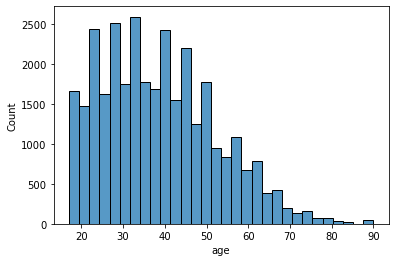

In [26]:
sns.histplot(df['age'], bins=30)

<AxesSubplot:xlabel='age', ylabel='Count'>

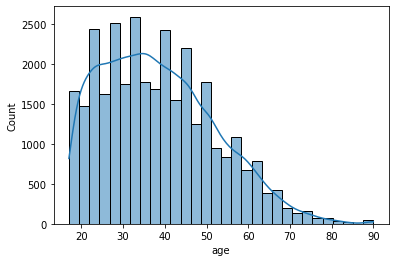

In [27]:
sns.histplot(df['age'], bins=30, kde=True)

<AxesSubplot:xlabel='age', ylabel='Count'>

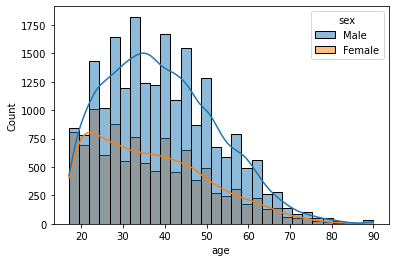

In [28]:
sns.histplot(data=df, x='age', bins=30, kde=True, hue="sex")

<AxesSubplot:xlabel='age', ylabel='hours-per-week'>

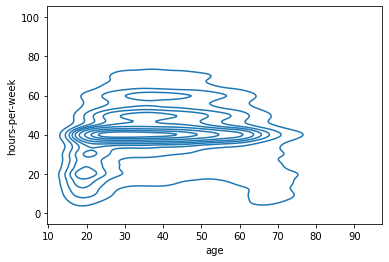

In [29]:
sns.kdeplot(data=df, x="age", y="hours-per-week")

<AxesSubplot:xlabel='age', ylabel='hours-per-week'>

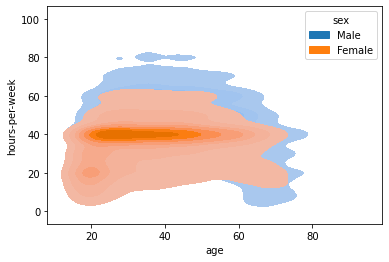

In [30]:
sns.kdeplot(data=df, x="age", y="hours-per-week", hue="sex", fill=True)

<AxesSubplot:xlabel='sex', ylabel='hours-per-week'>

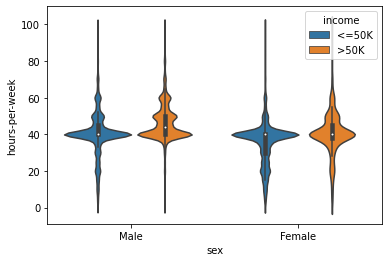

In [31]:
sns.violinplot(data=df, x="sex", y="hours-per-week", hue="income")

<AxesSubplot:>

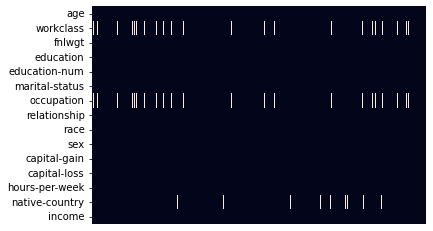

In [32]:
sns.heatmap(df.isnull().T, xticklabels=False, cbar=False)

<AxesSubplot:>

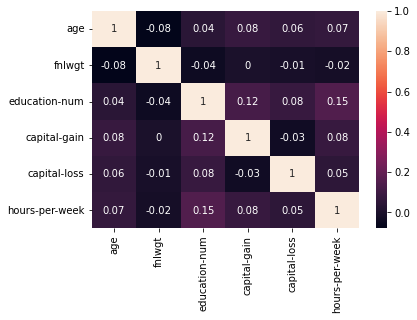

In [33]:
correlation_df = df.corr().round(2)
sns.heatmap(correlation_df, annot=True)

<AxesSubplot:xlabel='education', ylabel='occupation'>

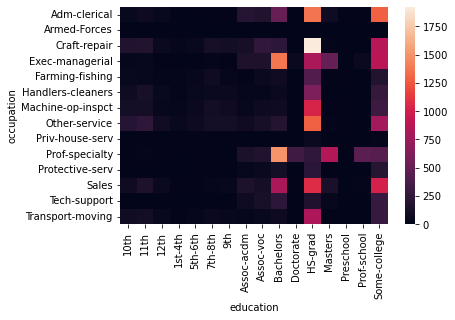

In [34]:
ctab_df = pd.crosstab(df["occupation"], df["education"])
sns.heatmap(ctab_df)

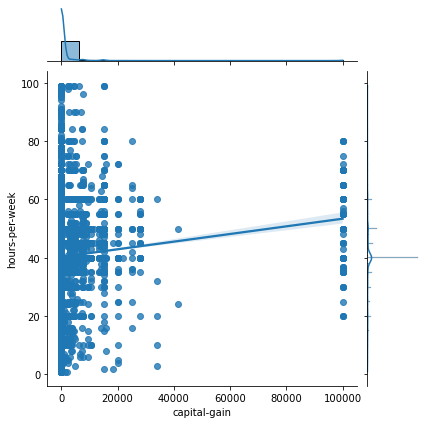

In [35]:
sns.jointplot(data=df, x="capital-gain", y="hours-per-week", kind="reg")

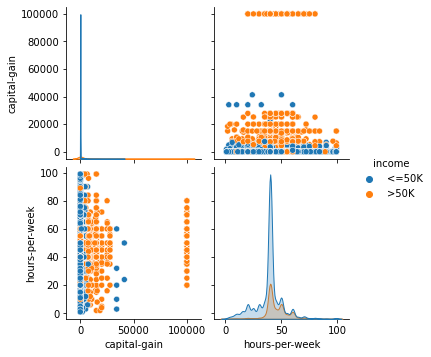

In [36]:
sns.pairplot(df, vars=["capital-gain", "hours-per-week"], hue="income")

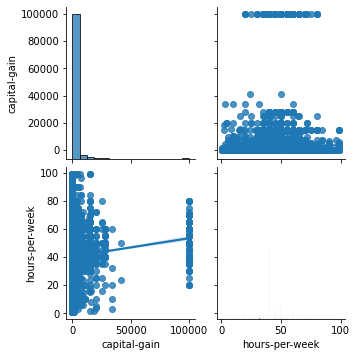

In [37]:
sns.pairplot(df, vars=["capital-gain", "hours-per-week"], kind="reg")